In [1]:
#A_ch02_102_lasso.ipynb
#正規化線性迴歸 Lasso (L1 regularization)

In [2]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
#step 1. 準備資料 Boston Dataset (506 data point, 105 衍生 feature)
X,y=mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [4]:
#step 2. 建立與訓練模型
from sklearn.linear_model import Lasso #import Lasso
from sklearn.linear_model import Ridge #import ridge

In [5]:
ridgeModel=Ridge(alpha=0.1).fit(X_train,y_train)

In [6]:
lassoModel=Lasso().fit(X_train,y_train)

In [7]:
#step 3. 評估
#train dataset
train_score=lassoModel.score(X_train,y_train)
print(train_score)
print('Number of features used:',np.sum(lassoModel.coef_!=0)) #係數不為零者

0.293237689911
Number of features used: 4


In [8]:
#test dataset
test_score=lassoModel.score(X_test,y_test)
print(test_score)
print('Number of features used:',np.sum(lassoModel.coef_!=0)) #係數不為零者

0.209375032553
Number of features used: 4


In [9]:
#=========================================================================
#Lasso 模型參數調整,alpha,max_iter

In [10]:
#預設 alpha=1.0
lassoModel_1=Lasso(1.0).fit(X_train,y_train)
train_score=lassoModel_1.score(X_train,y_train)
test_score=lassoModel_1.score(X_test,y_test)
print('train_score:',train_score)
print('test_score: ',test_score)
print('Number of features used:',np.sum(lassoModel_1.coef_!=0))

train_score: 0.293237689911
test_score:  0.209375032553
Number of features used: 4


In [11]:
# alpha=0.01, max_iter=100000
lassoModel_001=Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
train_score=lassoModel_001.score(X_train,y_train)
test_score=lassoModel_001.score(X_test,y_test)
print('train_score:',train_score)
print('test_score: ',test_score)
print('Number of features used:',np.sum(lassoModel_001.coef_!=0))

train_score: 0.896506955975
test_score:  0.765648988784
Number of features used: 33


In [12]:
# alpha=0.0001, max_iter=100000
lassoModel_00001=Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
train_score=lassoModel_00001.score(X_train,y_train)
test_score=lassoModel_00001.score(X_test,y_test)
print('train_score:',train_score)
print('test_score: ',test_score)
print('Number of features used:',np.sum(lassoModel_00001.coef_!=0))

train_score: 0.951061043618
test_score:  0.640309899416
Number of features used: 94


In [13]:
#======================================================================
#繪圖比較 不同alpha值 lasso model

In [14]:
%matplotlib inline

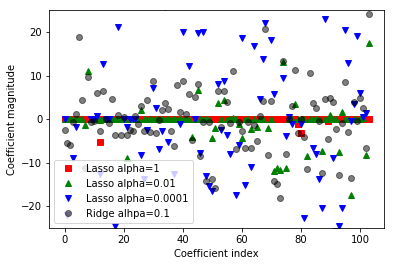

In [17]:
plt.plot(lassoModel_1.coef_,'rs',label='Lasso alpha=1')
plt.plot(lassoModel_001.coef_,'g^',label='Lasso alpha=0.01')
plt.plot(lassoModel_00001.coef_,'bv',label='Lasso alpha=0.0001')
plt.plot(ridgeModel.coef_,'ko',alpha=0.5,label='Ridge alhpa=0.1')
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend(loc=0)